<a href="https://colab.research.google.com/github/Pranalikillekar/IRIS-FLOWER-CLASSIFICATION/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)


In [4]:
# Assumes IRIS.csv is in your working directory
iris_data = pd.read_csv("IRIS.csv")


In [5]:
label_encoder = LabelEncoder()
iris_data['species_encoded'] = label_encoder.fit_transform(iris_data['species'])
# Now species: Iris-setosa→0, Iris-versicolor→1, Iris-virginica→2


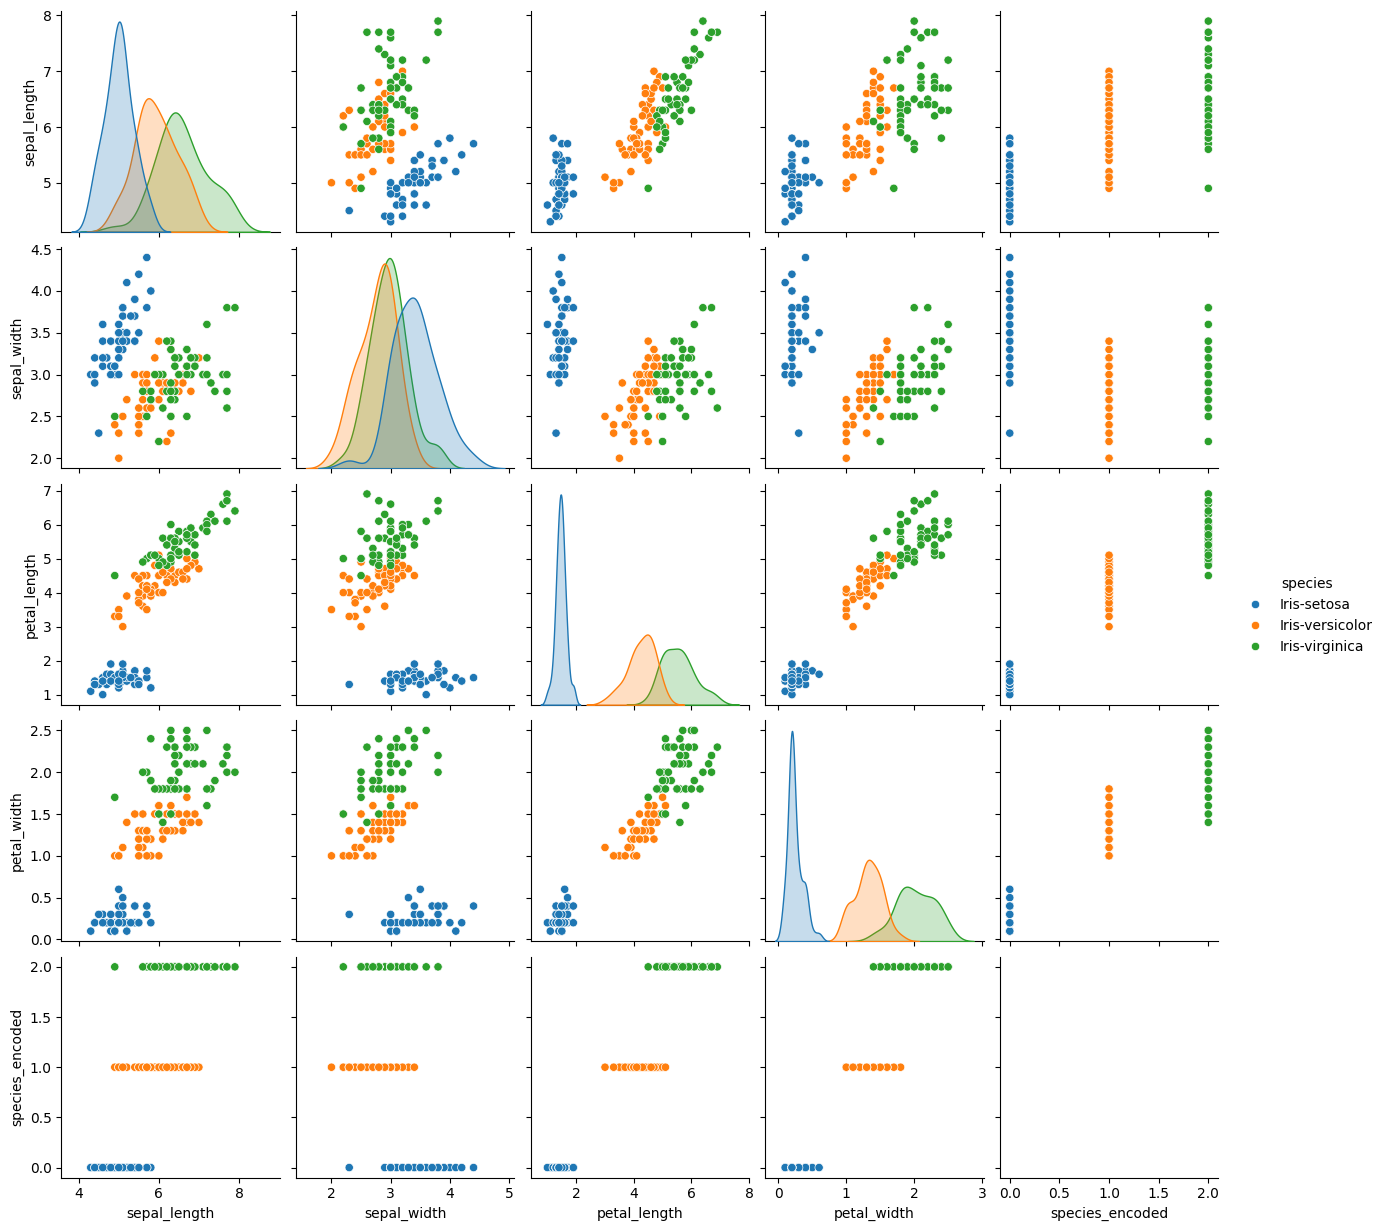

In [6]:
sns.pairplot(iris_data, hue="species")
plt.show()


In [7]:
X = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_data['species_encoded']


In [9]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred, target_names=label_encoder.classes_))


Random Forest Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



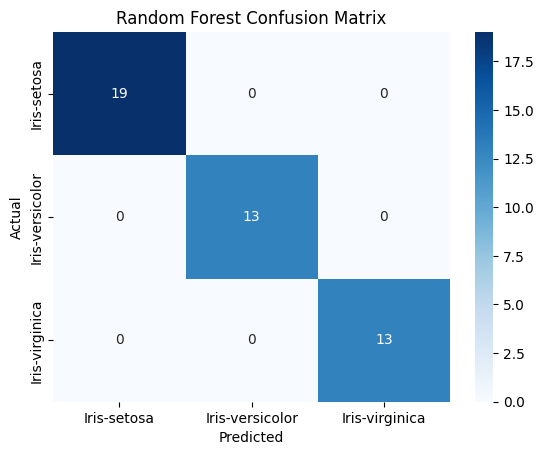

In [10]:
rf_cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(
    rf_cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred, target_names=label_encoder.classes_))


KNN Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



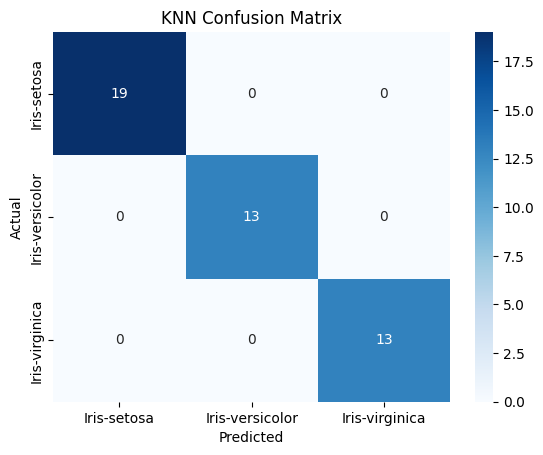

In [12]:
knn_cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(
    knn_cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
new_data = pd.DataFrame({
    "sepal_length": [6.7],
    "sepal_width":  [6.5],
    "petal_length": [3.4],
    "petal_width":  [2.9]
})

rf_pred_new  = rf_model.predict(new_data)
knn_pred_new = knn_model.predict(new_data)

print("Random Forest predicts:", label_encoder.inverse_transform(rf_pred_new)[0])
print("KNN predicts:",          label_encoder.inverse_transform(knn_pred_new)[0])


Random Forest predicts: Iris-virginica
KNN predicts: Iris-virginica


In [14]:
predictions_df = pd.DataFrame({
    **new_data,
    "RF_Prediction": label_encoder.inverse_transform(rf_pred_new),
    "KNN_Prediction": label_encoder.inverse_transform(knn_pred_new)
})
predictions_df.to_csv("flower_predictions.csv", index=False)
print("Saved to flower_predictions.csv")


Saved to flower_predictions.csv
